<a href="https://colab.research.google.com/github/ivaniaHer/PythonLearningExcercises/blob/master/Practica1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 1

RESULTADOS DEL MODELO SVM
Exactitud: 0.9825

Matriz de Confusión:
[[41  1]
 [ 1 71]]

Reporte de Clasificación:
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



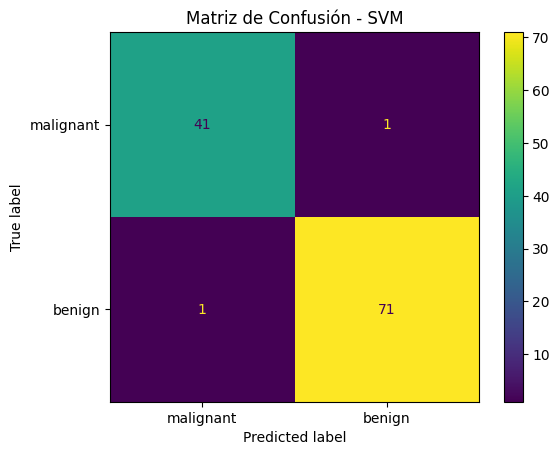

In [3]:
# LABORATORIO SVM CON PIPELINE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay


# 2. Cargar dataset
data = load_breast_cancer()

# 3. Separar variables (X) y etiqueta (y)
X = data.data
y = data.target

# 4. Dividir datos (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 5. Crear Pipeline (Escalado + SVM)
modelo = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(
        kernel='rbf',
        C=1,
        gamma='scale'
    ))
])

# 6. Entrenar modelo
modelo.fit(X_train, y_train)

# 7. Predecir
y_pred = modelo.predict(X_test)

# 8. Exactitud
accuracy = accuracy_score(y_test, y_pred)
print("RESULTADOS DEL MODELO SVM")
print(f"Exactitud: {accuracy:.4f}")

# 9. Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusión:")
print(cm)

# 10. Reporte completo
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

# 11. Visualización de matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=data.target_names)

disp.plot()
plt.title("Matriz de Confusión - SVM")
plt.show()


# Ejercicio 2

REGRESIÓN LOGÍSTICA
Accuracy: 0.9825

Matriz de Confusión:
[[41  1]
 [ 1 71]]

Reporte:
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



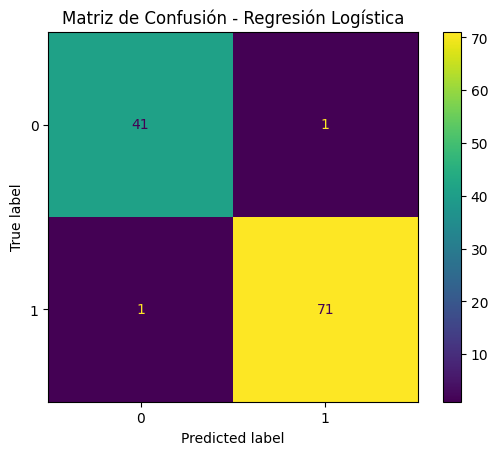

ÁRBOL DE DECISIÓN
Accuracy: 0.9211

Matriz de Confusión:
[[38  4]
 [ 5 67]]

Reporte:
              precision    recall  f1-score   support

   malignant       0.88      0.90      0.89        42
      benign       0.94      0.93      0.94        72

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



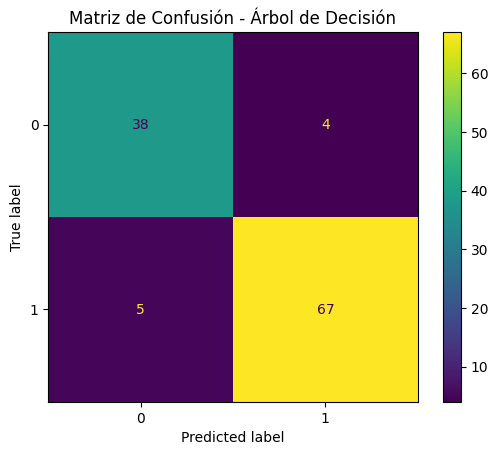

TOP 5 VARIABLES MÁS IMPORTANTES
1. worst radius -> 0.7511
2. worst concave points -> 0.1250
3. texture error -> 0.0469
4. worst texture -> 0.0331
5. worst concavity -> 0.0176
COMPARACIÓN DE MODELOS
Regresión Logística Accuracy: 0.9825
Árbol de Decisión Accuracy:   0.9211


In [5]:
# LABORATORIO – REGRESIÓN LOGÍSTICA + ÁRBOL

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# CARGA DE DATOS
data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# REGRESIÓN LOGÍSTICA (BASELINE
modelo_log = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(max_iter=5000))
])

modelo_log.fit(X_train, y_train)

y_pred_log = modelo_log.predict(X_test)

acc_log = accuracy_score(y_test, y_pred_log)

print("REGRESIÓN LOGÍSTICA")
print(f"Accuracy: {acc_log:.4f}")
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_log))
print("\nReporte:")
print(classification_report(y_test, y_pred_log, target_names=data.target_names))

# Matriz gráfica
ConfusionMatrixDisplay.from_estimator(modelo_log, X_test, y_test)
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()


# ÁRBOL DE DECISIÓN
modelo_tree = DecisionTreeClassifier(
    max_depth=4,
    min_samples_leaf=5,
    random_state=42
)

modelo_tree.fit(X_train, y_train)

y_pred_tree = modelo_tree.predict(X_test)

acc_tree = accuracy_score(y_test, y_pred_tree)

print("ÁRBOL DE DECISIÓN")
print(f"Accuracy: {acc_tree:.4f}")
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_tree))
print("\nReporte:")
print(classification_report(y_test, y_pred_tree, target_names=data.target_names))

# Matriz gráfica
ConfusionMatrixDisplay.from_estimator(modelo_tree, X_test, y_test)
plt.title("Matriz de Confusión - Árbol de Decisión")
plt.show()

# FEATURE IMPORTANCE

importancias = modelo_tree.feature_importances_
nombres = data.feature_names
indices = np.argsort(importancias)[::-1]

print("TOP 5 VARIABLES MÁS IMPORTANTES")

for i in range(5):
    print(f"{i+1}. {nombres[indices[i]]} -> {importancias[indices[i]]:.4f}")

# COMPARACIÓN FINAL

print("COMPARACIÓN DE MODELOS")
print(f"Regresión Logística Accuracy: {acc_log:.4f}")
print(f"Árbol de Decisión Accuracy:   {acc_tree:.4f}")


# Ejercicio 3

In [6]:
# 1–4. Importaciones
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# 5–7. Cargar dataset y separar
data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 8. Crear árbol con control de sobreajuste
tree = DecisionTreeClassifier(
    max_depth=4,
    min_samples_leaf=5,
    random_state=42
)

# 9. Entrenar
tree.fit(X_train, y_train)

# 10–11. Predecir y medir accuracy
y_pred = tree.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# 12–14. Importancia de variables
importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]  # ordenar de mayor a menor

print("\nTop 5 variables más importantes:")
for i in indices[:5]:
    print(f"{data.feature_names[i]} => {round(importances[i], 4)}")


Accuracy: 0.9473684210526315

Top 5 variables más importantes:
mean concave points => 0.7412
worst concave points => 0.0704
worst radius => 0.0561
worst perimeter => 0.0552
mean texture => 0.0297


# Ejercicio 4

In [7]:
# 1–5. Importaciones
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# 6–8. Cargar dataset y separar
data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 9. Crear Random Forest
rf = RandomForestClassifier(
    n_estimators=300,       # cantidad de árboles
    min_samples_leaf=5,     # regularización
    n_jobs=-1,              # usa todos los núcleos
    random_state=42
)

# 10. Entrenar
rf.fit(X_train, y_train)

# 11–12. Evaluación en test
y_pred = rf.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print("Test accuracy:", test_acc)

# 13–14. Validación cruzada 5-fold
cv_scores = cross_val_score(rf, X, y, cv=5)

print("CV mean:", round(cv_scores.mean(), 4),
      "CV std:", round(cv_scores.std(), 4))

Test accuracy: 0.9649122807017544
CV mean: 0.9596 CV std: 0.0226


# Ejercicio 5

In [8]:
# 1. Importar librerías necesarias
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 2. Generar datos artificiales
# 600 puntos distribuidos en 4 clusters
X, _ = make_blobs(n_samples=600, centers=4, random_state=42)

# 3. Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Configurar K-Means
kmeans = KMeans(
    n_clusters=4,     # Número de clusters esperados
    n_init=10,        # Evita malas inicializaciones
    random_state=42
)

# 5. Entrenar y predecir clusters
labels = kmeans.fit_predict(X_scaled)

# 6. Evaluar con Silhouette Score
score = silhouette_score(X_scaled, labels)

# 7. Mostrar resultado
print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.7948


# Ejercicio 6

In [9]:
# 1. combinations para formar pares
from itertools import combinations

# 2. Lista de transacciones
# Cada compra es un conjunto
transactions = [
    {"pan", "leche", "huevos"},
    {"pan", "leche"},
    {"leche", "mantequilla"},
    {"pan", "huevos"},
    {"pan", "leche", "mantequilla"},
    {"pan", "leche"},
]

# 3. Función soporte
def support(itemset, transactions):
    # 4. Cuenta cuántas transacciones contienen el conjunto
    count = sum(1 for t in transactions if itemset.issubset(t))

    # 5. Divide por total → soporte [0,1]
    return count / len(transactions)

# 6. Umbral mínimo de soporte
min_sup = 0.3

# 7. Lista de ítems únicos
items = sorted({item for t in transactions for item in t})

# 8. Itemsets frecuentes tamaño 1
freq_1 = []
for item in items:
    s = support({item}, transactions)
    if s >= min_sup:
        freq_1.append({item})

# 9–12. Generar pares candidatos (tamaño 2)
freq_2 = []
for pair in combinations(items, 2):
    pair_set = set(pair)
    s = support(pair_set, transactions)
    if s >= min_sup:
        freq_2.append(pair_set)

# 13–14. Mostrar frecuentes
print("Frecuentes tamaño 1:", freq_1)
print("Frecuentes tamaño 2:", freq_2)

# 15–20. Generar reglas desde pares frecuentes
print("\nReglas de asociación:")
for pair in freq_2:
    a, b = list(pair)

    # Confianza A -> B
    conf_ab = support(pair, transactions) / support({a}, transactions)

    # Confianza B -> A
    conf_ba = support(pair, transactions) / support({b}, transactions)

    print(f"{a} -> {b} | conf={conf_ab:.2f}")
    print(f"{b} -> {a} | conf={conf_ba:.2f}")

Frecuentes tamaño 1: [{'huevos'}, {'leche'}, {'mantequilla'}, {'pan'}]
Frecuentes tamaño 2: [{'huevos', 'pan'}, {'leche', 'mantequilla'}, {'leche', 'pan'}]

Reglas de asociación:
huevos -> pan | conf=1.00
pan -> huevos | conf=0.40
leche -> mantequilla | conf=0.40
mantequilla -> leche | conf=1.00
leche -> pan | conf=0.80
pan -> leche | conf=0.80
